# Scraping UCSD's Linguistics Department Webpage

## **Introduction**: 
    
   The following code demonstrates the process of extracting information from [UCSD's Linguistics Department webpage](https://linguistics.ucsd.edu/undergrad/courses.html#Spring-2018), obtaining information on course offerings from Fall 2013 to Spring 2018; a few quarters were excluded due to the lack of availability/technical difficulties. 
    
   In the analysis, the reasoning behind the number of classes taught by professors will be explained, along with an explanation to why certain classes are taught more than others.
    
   Overall, this is meant to look into how classes are planned out, using the most recent years to find a pattern that would match our assumptions. 

## Retrieving the HTML Code

In [1]:
# Read in the website url to get the sites html
from requests import get

url = 'http://ling.ucsd.edu/undergrad/courses.html'

response = get(url)

In [2]:
# Convert the html into a BeautifulSoup object
from bs4 import BeautifulSoup

soup = BeautifulSoup(response.text, 'html.parser')

In [3]:
# Extract all the div(class = drawer) containers from the BeautifulSoup object
class_containers = soup.find('div', class_ = 'drawer')

In [4]:
# Extract all the quarter/years available
years = class_containers.find_all('a')
years

[<a href="#">Fall 2017</a>,
 <a href="#">Winter 2018</a>,
 <a href="#">Spring 2018</a>,
 <a href="#">Spring 2017</a>,
 <a href="#">Winter 2017</a>,
 <a href="#">Fall 2016</a>,
 <a href="#">Spring 2016</a>,
 <a href="#">Winter 2016</a>,
 <a href="#">Fall 2015</a>,
 <a href="#">Fall 2014</a>,
 <a href="#">Winter 2015</a>,
 <a href="#">Spring 2015</a>,
 <a href="http://grammar.ucsd.edu/courses/lign105">Law and Language</a>,
 <a href="#">Fall 2013</a>,
 <a href="http://grammar.ucsd.edu/courses/lign7/">Sign Language and its Culture</a>,
 <a href="#">Winter 2014</a>,
 <a href="#">Spring 2014</a>,
 <a href="http://grammar.ucsd.edu/courses/lign105">Law and Language</a>]

*****
# Graphing the Number of Classes each Professor Taught


## Cleaning the list of False Positives

In [5]:
# Delete <a href="http://grammar.ucsd.edu/courses/lign105">Law and Language</a>
del years[12]
years

[<a href="#">Fall 2017</a>,
 <a href="#">Winter 2018</a>,
 <a href="#">Spring 2018</a>,
 <a href="#">Spring 2017</a>,
 <a href="#">Winter 2017</a>,
 <a href="#">Fall 2016</a>,
 <a href="#">Spring 2016</a>,
 <a href="#">Winter 2016</a>,
 <a href="#">Fall 2015</a>,
 <a href="#">Fall 2014</a>,
 <a href="#">Winter 2015</a>,
 <a href="#">Spring 2015</a>,
 <a href="#">Fall 2013</a>,
 <a href="http://grammar.ucsd.edu/courses/lign7/">Sign Language and its Culture</a>,
 <a href="#">Winter 2014</a>,
 <a href="#">Spring 2014</a>,
 <a href="http://grammar.ucsd.edu/courses/lign105">Law and Language</a>]

In [6]:
# Delete <a href="http://grammar.ucsd.edu/courses/lign7/">Sign Language and its Culture</a>
del years[13]
years

[<a href="#">Fall 2017</a>,
 <a href="#">Winter 2018</a>,
 <a href="#">Spring 2018</a>,
 <a href="#">Spring 2017</a>,
 <a href="#">Winter 2017</a>,
 <a href="#">Fall 2016</a>,
 <a href="#">Spring 2016</a>,
 <a href="#">Winter 2016</a>,
 <a href="#">Fall 2015</a>,
 <a href="#">Fall 2014</a>,
 <a href="#">Winter 2015</a>,
 <a href="#">Spring 2015</a>,
 <a href="#">Fall 2013</a>,
 <a href="#">Winter 2014</a>,
 <a href="#">Spring 2014</a>,
 <a href="http://grammar.ucsd.edu/courses/lign105">Law and Language</a>]

In [7]:
# Delete <a href="http://grammar.ucsd.edu/courses/lign105">Law and Language</a>
del years[15]
years

[<a href="#">Fall 2017</a>,
 <a href="#">Winter 2018</a>,
 <a href="#">Spring 2018</a>,
 <a href="#">Spring 2017</a>,
 <a href="#">Winter 2017</a>,
 <a href="#">Fall 2016</a>,
 <a href="#">Spring 2016</a>,
 <a href="#">Winter 2016</a>,
 <a href="#">Fall 2015</a>,
 <a href="#">Fall 2014</a>,
 <a href="#">Winter 2015</a>,
 <a href="#">Spring 2015</a>,
 <a href="#">Fall 2013</a>,
 <a href="#">Winter 2014</a>,
 <a href="#">Spring 2014</a>]

In [8]:
# Delete <a href="#">Fall 2014</a>
del years[9]


In [9]:
# Delete <a href="#">Winter 2014</a>
del years[12]


In [10]:
# Delete <a href="#">Spring 2014</a>
del years[12]

In [11]:
# Excludes Winter & Spring 2014/ Fall 2014
# Winter & Spring 2014 had some format issues
# Fall 2014 was left blank
years

[<a href="#">Fall 2017</a>,
 <a href="#">Winter 2018</a>,
 <a href="#">Spring 2018</a>,
 <a href="#">Spring 2017</a>,
 <a href="#">Winter 2017</a>,
 <a href="#">Fall 2016</a>,
 <a href="#">Spring 2016</a>,
 <a href="#">Winter 2016</a>,
 <a href="#">Fall 2015</a>,
 <a href="#">Winter 2015</a>,
 <a href="#">Spring 2015</a>,
 <a href="#">Fall 2013</a>]

***
## Extracting the Course number, Title, and Professor

In [12]:
# Courses offered in one quarter
course_offerings = class_containers.find_all('article')
del course_offerings[9]  # Deleted the quarter that was left blank

In [13]:
# The title of the course + professor
professors = course_offerings[0].find_all('p')
professors # Start at index 12 of the string
# Classes are even, profs are odd

[<p>The Linguistics of Invented Languages</p>,
 <p><strong>Instructor:</strong> G. Goodall</p>,
 <p>Languages and Cultures of America</p>,
 <p><strong>Instructor:</strong> G. Caballero</p>,
 <p>Introduction to the Study of Language</p>,
 <p><strong>Instructor:</strong> A. Kehler</p>,
 <p>Phonetics</p>,
 <p><strong>Instructor:</strong> E. Bakovic</p>,
 <p>Discourse Analysis: American Sign Language Poetry and Performing Arts</p>,
 <p><strong>Instructor:</strong> P. Lott</p>,
 <p>Historical Linguistics</p>,
 <p><strong>Instructor:</strong> Staff</p>,
 <p>Indigenours Languages of the Americas</p>,
 <p><strong>Instructor:</strong> G. Caballero</p>,
 <p>Evolution of Language</p>,
 <p><strong>Instructor:</strong> Kluender</p>,
 <p>Chlid Language Acquisition</p>,
 <p><strong>Instructor:</strong> R. Mayberry</p>]

## Piecing Everything Together

In [14]:
quarter_year = []  # Stores the quarter + year Ex: Winter 2017
professors = []    # List of profs
courses = []       # List of lists of courses offering per quarter
course_titles = [] # List of course titles 

counter = 0 # Keeps track of the index: Classes are even, profs are odd
num_quarters = [i for i in range(len(years))]

for quarter in num_quarters:
    
    # Adds all the course numbers within a given quarter
    courses.append([course_num.text for course_num in (course_offerings[quarter].find_all('h2'))])
    
    # Add course titles or profs of each class offered
    for element in course_offerings[quarter].find_all('p'):
        if counter % 2 == 0:
            course_titles.append(element.text)
            counter += 1
        else:
            professors.append(element.text[12:])
            counter += 1

In [15]:
# List of the corresponding quarter/year of each course
quarter_year = [] # Ex: Fall 2017

for quarter in num_quarters:
    for num_courses in range(len(courses[quarter])):
        quarter_year.append(years[quarter].text )

In [16]:
# List of all the course numbers from all the quarters
courses_edited = []

for quarter in num_quarters: 
    courses_edited +=  [course_num.text for course_num in (course_offerings[quarter].find_all('h2'))]

## Creating the DataFrame to store all the Data

In [17]:
# Create a DataFrame to store all the acquired information
import pandas as pd

course_offerings_final = pd.DataFrame({'Quarter/Year': quarter_year,
                        'Course Number': courses_edited,
                        'Course Title': course_titles,
                        'Professors': professors})
course_offerings_final = course_offerings_final[['Course Number', 'Course Title', 'Professors', 'Quarter/Year']]
course_offerings_final.head(27)

,Course Number,Course Title,Professors,Quarter/Year
0,LIGN 5,The Linguistics of Invented Languages,G. Goodall,Fall 2017
1,LIGN 8,Languages and Cultures of America,G. Caballero,Fall 2017
2,LIGN 101,Introduction to the Study of Language,A. Kehler,Fall 2017
3,LIGN 110,Phonetics,E. Bakovic,Fall 2017
4,LIGN 144,Discourse Analysis: American Sign Language Poe...,P. Lott,Fall 2017
5,LIGN 150,Historical Linguistics,Staff,Fall 2017
6,LIGN 152,Indigenours Languages of the Americas,G. Caballero,Fall 2017
7,LIGN 155,Evolution of Language,Kluender,Fall 2017
8,LIGN 171,Chlid Language Acquisition,R. Mayberry,Fall 2017
9,LIGN 7,Sign Language and its Culture,R. Mayberry,Winter 2018


## Retrieving the number of courses taught

In [18]:
# Example of finding all the courses a particular prof has taught between the range [fall 2013 - Spring 2018]
kehler_classes = course_offerings_final["Professors"] == "A. Kehler"
course_offerings_final[kehler_classes]

,Course Number,Course Title,Professors,Quarter/Year
2,LIGN 101,Introduction to the Study of Language,A. Kehler,Fall 2017
11,LIGN 17,Making and Breaking Codes,A. Kehler,Winter 2018
37,LIGN 17,Making and Breaking Codes,A. Kehler,Winter 2017
51,LIGN 160,Pragmatics,A. Kehler,Fall 2016
62,LIGN 17,Making and Breaking Codes,A. Kehler,Winter 2016
75,LIGN 160,Pragmatics,A. Kehler,Fall 2015
79,LIGN 17,Making and Breaking Codes,A. Kehler,Winter 2015


In [19]:
# Retrieve the number of classes a prof has taught within the range
classes_taught = [] # List of ints that represent the number of classes taught
num_classes = [] # List of classes that a prof has taught
profs = [] # All profs who has taught

for professor in set(professors):
    num_classes = course_offerings_final["Professors"] == professor
    classes_taught.append(len(course_offerings_final[num_classes]))
    profs.append(professor)

## Fixing false positives/errors

In [20]:
# Delete kluender -> Should have been counted towards R. Kluender
del classes_taught[14]

In [21]:
# Delete kluender
del profs[14]

In [22]:
# Add back to R. Kluender
classes_taught[5] = classes_taught[5] + 1

## DataFrame for the Number of Classes Taught

In [23]:
# Create DataFrame of Professors to number of classes taught
course_distribution = pd.DataFrame({'Professors': profs,
                                    'Classes_taught': classes_taught })

# Reorder columns
course_distribution = course_distribution[["Professors", "Classes_taught"]]

# Plotting out the distribution: Number of Classes Taught 

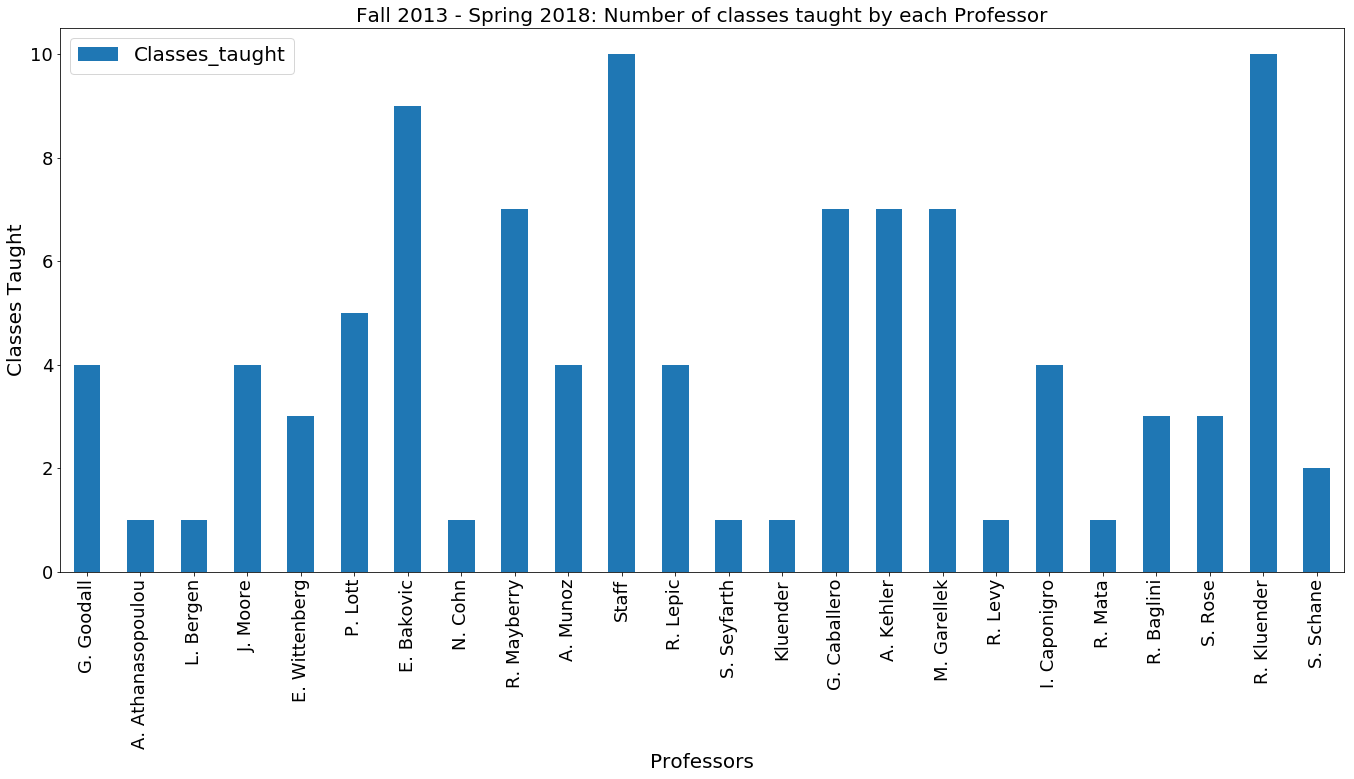

In [24]:
import matplotlib.pyplot as plt

%matplotlib inline
course_distribution.plot.bar(x='Professors',y='Classes_taught',
                             figsize = (23,10),
                             fontsize=18,
                             legend=True)

plt.title('Fall 2013 - Spring 2018: Number of classes taught by each Professor', fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Professors', fontsize=20)
plt.ylabel('Classes Taught', fontsize=20)

* **This distribution isn't completely representative of all the classes that each professor taught. Winter & Spring 2014 was excluded due to formatting errors and Fall 2014 was left blank.**



* **12 quarters had been used for this dataset**

## Analysis on the Number of Classes Taught

Base of the graph above, the top 3 professors are the following:
1. R. Kluender
2. Staff
3. E. Bakovic

***
### R. Kluender
Starting with the professor at rank 1, R. Kluender appears to have taught for nearly 12 quarters; the only exception being Fall 2016.

In [25]:
# Changing Kluender into R. Kluender
course_offerings_final["Professors"][7] = "R. Kluender"   

In [26]:
# Display all the classes that R. Kluender had taught between Fall 2013 - Spring 2018
kluender_classes = course_offerings_final["Professors"] == "R. Kluender"
course_offerings_final[kluender_classes]

,Course Number,Course Title,Professors,Quarter/Year
7,LIGN 155,Evolution of Language,R. Kluender,Fall 2017
18,LIGN 181,Language Processing in the Brain,R. Kluender,Winter 2018
23,LIGN 1XX,TBD,R. Kluender,Spring 2018
35,LIGN 179,Second Language Acquisition Research,R. Kluender,Spring 2017
44,LIGN 180,Language Representation in the Brain,R. Kluender,Winter 2017
53,LIGN 4,Language as a Cognitive System,R. Kluender,Spring 2016
68,LIGN 155,Evolution of Language,R. Kluender,Winter 2016
77,LIGN 181,Language Processing in the Brain,R. Kluender,Fall 2015
78,LIGN 4,Language as a Cognitive System,R. Kluender,Winter 2015
93,LIGN 179,Second Language Acquisition Research,R. Kluender,Spring 2015


Base on the courses that R. Kluender had taught over the course of 4 years, it appears that a class based on cognitive linguistics/ language acquisition or the like was offered every quarter. It also appears that all the classes he has taught was offered  at least twice, this in itself reflects how popular the subfield is within the linguistics department. 

***
### Staff

The second 'professor' that taught the most was Staff. In most cases, Staff is often a temp professor that is hired for a quarter or more; a quarter can have more than one class taught by the same temp professor or have multiple temp professors at a time. 

In [27]:
# Display all the classes that Staff had taught between Fall 2013 - Spring 2018
staff_classes = course_offerings_final["Professors"] == "Staff"
course_offerings_final[staff_classes]

,Course Number,Course Title,Professors,Quarter/Year
5,LIGN 150,Historical Linguistics,Staff,Fall 2017
10,LIGN 8,Languages and Cultures of America,Staff,Winter 2018
16,LIGN 121,Syntax I,Staff,Winter 2018
19,LIGN 8,Languages and Cultures of America,Staff,Spring 2018
20,LIGN 101,Introduction to the Study of Language,Staff,Spring 2018
28,LIGN 8,Languages and Cultures of America,Staff,Spring 2017
33,LIGN 165,Computational Linguistics,Staff,Spring 2017
58,LIGN 170,Psycholinguistics,Staff,Spring 2016
63,LIGN 101,Introduction to the Study of Language,Staff,Winter 2016
95,LIGN 101,Introduction to the Study of Language,Staff,Fall 2013


* **LIGN 101**: As shown in the table, this class appears to be taught by a temp professor more so than other classes. It being an introduction course to Linguistics, we can assume that it is a type of class that requires a good foundation in linguistic theory in all subfields to be taught. It being a broad course, a potential hypothesis to why it was 'outsourced' could be that the main faculty would rather do research, or teach a specific elective rather than teaching an introductary course.

* **LIGN 8**: The explanation of LIGN 8 is similar to that of LIGN 101, but in this case it's a lower division course.

* **LIGN 165 & LIGN 167**: Prior to the 2016-2017 year, there wasn't a definitive faculty member in the Linguistics Department that taught Computational Linguistics and Psycholinguistics. This required temp professors to fill in, in order for the department to offer these two classes.

***
### E. Bakovic


In [28]:
# Display all the classes that E. Bakovic had taught between Fall 2013 - Spring 2018
bakovic_classes = course_offerings_final["Professors"] == "E. Bakovic"
course_offerings_final[bakovic_classes]

,Course Number,Course Title,Professors,Quarter/Year
3,LIGN 110,Phonetics,E. Bakovic,Fall 2017
13,LIGN 111,Phonology I,E. Bakovic,Winter 2018
26,LIGN 175,Sociolinguistics,E. Bakovic,Spring 2018
40,LIGN 111,Phonology I,E. Bakovic,Winter 2017
49,LIGN 143,The Structure of Spanish,E. Bakovic,Fall 2016
64,LIGN 111,Phonology I,E. Bakovic,Winter 2016
71,LIGN 101,Introduction to the Study of Language,E. Bakovic,Fall 2015
81,LIGN 111,Phonology I,E. Bakovic,Winter 2015
99,LIGN 175,Sociolinguistics,E. Bakovic,Fall 2013


Being the third professor to teach the most classes within Fall 2013 - Spring 2018, it is most likely the case due to the fact that he regularly teaches a core class, Phonology, as well as teach other classes such as sociolinguistics, phonetics and even LIGN 101. This comes to show that he teaches a few more classes than those who strictly teach one core class + one elective (offered every other year).

***
# Plotting out the distribution: Number of Times a Class was Taught

In [29]:
# List of all the courses that are taught within the range
all_courses = sorted(list(set(courses_edited)))

In [30]:
# Example of getting the number of times a class was taught
num_class_taught = course_offerings_final["Course Number"] == 'LIGN 101'
course_offerings_final[num_class_taught]

,Course Number,Course Title,Professors,Quarter/Year
2,LIGN 101,Introduction to the Study of Language,A. Kehler,Fall 2017
12,LIGN 101,Introduction to the Study of Language,I. Caponigro,Winter 2018
20,LIGN 101,Introduction to the Study of Language,Staff,Spring 2018
29,LIGN 101,Introduction to the Study of Language,E. Wittenberg,Spring 2017
38,LIGN 101,Introduction to the Study of Language,R. Lepic,Winter 2017
46,LIGN 101,Introduction to the Study of Language,R. Lepic,Fall 2016
63,LIGN 101,Introduction to the Study of Language,Staff,Winter 2016
71,LIGN 101,Introduction to the Study of Language,E. Bakovic,Fall 2015
80,LIGN 101,Introduction to the Study of Language,R. Baglini,Winter 2015
95,LIGN 101,Introduction to the Study of Language,Staff,Fall 2013


In [31]:
# List of the number of times a course was taught
num_class_taught = []

for course in all_courses:
    course_total_taught = course_offerings_final["Course Number"] == course
    num_class_taught.append(len(course_offerings_final[course_total_taught]))

In [32]:
# Table of each class and the number of times it was taught
num_taught = pd.DataFrame({'Course': all_courses,
                           'Times_Taught': num_class_taught})
num_taught.head(10)

,Course,Times_Taught
0,LIGN 101,10
1,LIGN 105,2
2,LIGN 108,1
3,LIGN 110,4
4,LIGN 111,4
5,LIGN 112,3
6,LIGN 118,1
7,LIGN 119 / EDS 119,4
8,LIGN 120,4
9,LIGN 121,4


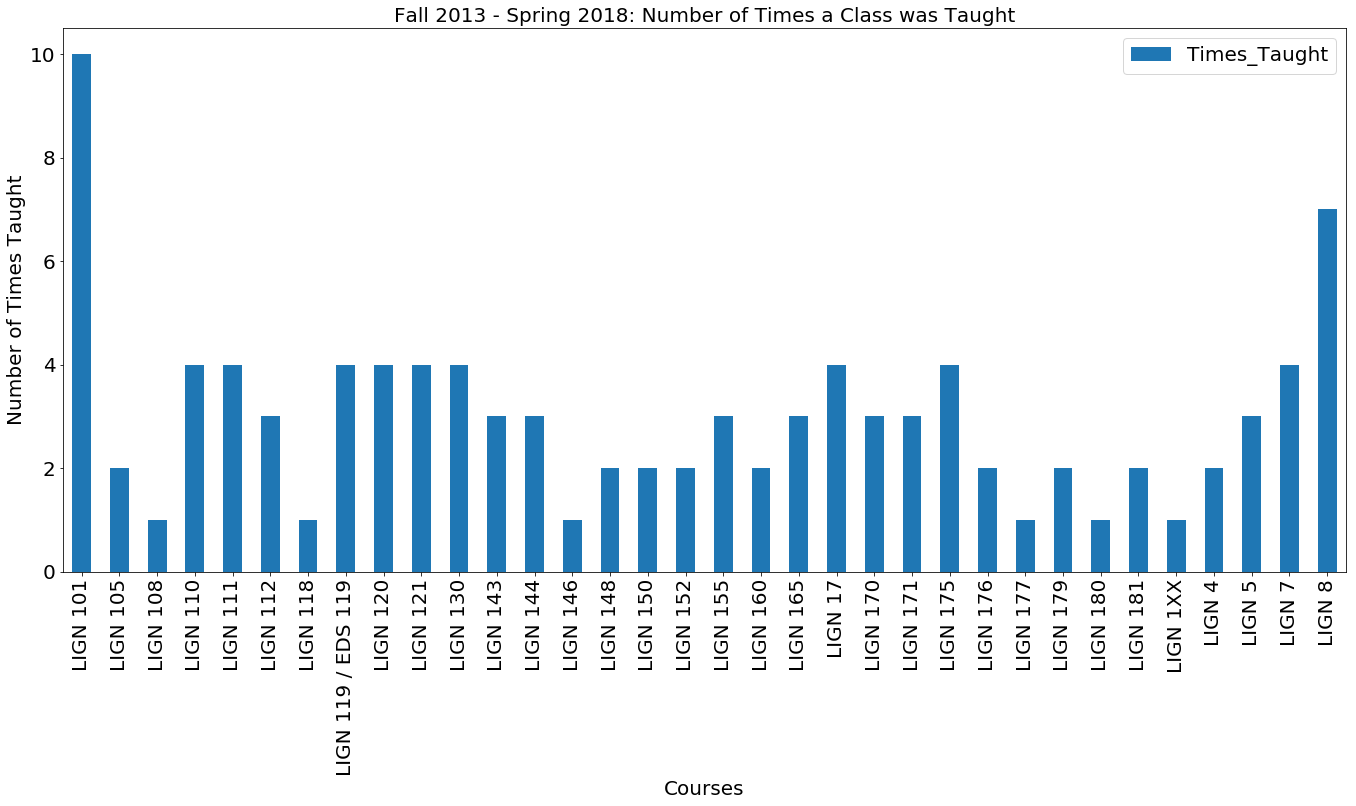

In [33]:
# Plotting out the distribution of the number of times a class was taught
num_graph = num_taught.plot.bar(x='Course',y='Times_Taught', 
                                figsize=(23,10),
                                legend=True,
                                fontsize=20)

plt.legend(fontsize=20)
plt.xlabel('Courses', fontsize=20)
plt.ylabel('Number of Times Taught', fontsize=20)
plt.title('Fall 2013 - Spring 2018: Number of Times a Class was Taught', fontsize=20)

* **This distribution isn't completely representative of the number of times a class was taught. Winter & Spring 2014 was excluded due to formatting errors and Fall 2014 was left blank.**

## Analysis on the Number of Times a Class was Taught

* **LIGN 8**: Since this class is a lower division that counts as a GE, it being taught more than once in a given school year is more common that any other course besides LIGN 101.

* **LIGN 101**: This being an prerequisite for most LIGN Courses as well as a GE course, it'll be common for it to be offered more than once in a school year.

* **LIGN 110, 111, 120, 121, 130**: (Phonetics, Phonology, Morphology, Syntax, Sematics) All of these courses are core classes, which explains why all of them have been taught 4 times within the past four years. *Each core class is teached once every year.